# Train a fastai model to recognize clothing items such as shirts, pants, socks, and dresses

## Install dependencies

In [1]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
#hide
from fastbook import *
from fastai.vision.widgets import *

## Create categories and a data folder

In [4]:
clothe_types = 'shirt', 'pants', 'dress', 'socks'
path = Path('clothes')

In [11]:
for o in clothe_types:
        dest = (path/o)
        dest.mkdir(exist_ok = True)
        results = search_images_ddg(f'{o}')
        download_images(dest, urls=results)

In [12]:
fns = get_image_files(path)
fns

(#874) [Path('clothes/shirt/23b09595-d4b7-4f8a-a3c3-939ab325ee21.jpg'),Path('clothes/shirt/7d3cabb4-9320-4afa-bab8-3050bec6ac00.jpg'),Path('clothes/shirt/58f2d173-1584-4079-b4cf-fbed1e8bbe2d.jpg'),Path('clothes/shirt/924b38b0-b918-41bc-82ae-8eab8390c884.png'),Path('clothes/shirt/30445c5b-db5d-444a-bc40-3f5571caafb2.png'),Path('clothes/shirt/78e66b9b-704d-4334-8475-7c4fe992d648.jpg'),Path('clothes/shirt/472b70e6-d645-4826-83ae-d46f4e8cf2e1.png'),Path('clothes/shirt/ad9b25fa-7494-4343-83de-b184d6424974.jpg'),Path('clothes/shirt/78ee5df4-72b7-4cc5-84df-c39f8b8fed0b.jpg'),Path('clothes/shirt/f5f68f44-25b0-4184-9d7a-91f6f44254aa.png')...]

## Unlink files with broken urls

In [13]:
failed = verify_images(fns)
failed

(#24) [Path('clothes/shirt/7ac27f81-313b-4b1c-a723-ad44ebc8190d.jpg'),Path('clothes/shirt/b3beb218-1977-4a61-9957-bf3a084d3607.jpg'),Path('clothes/shirt/56f26530-95ba-44be-9d40-70704dc45704.jpg'),Path('clothes/shirt/e50b70a7-7a65-4f84-b411-d24f62e26661.jpg'),Path('clothes/shirt/2d181476-6951-4198-a0da-8959b0695d4b.svg'),Path('clothes/shirt/2468b7ae-00f1-441d-81d8-da17670d8d1a.jpg'),Path('clothes/shirt/ec502169-c274-4149-b73c-fafe9a16b60c.jpg'),Path('clothes/socks/7203f93d-ddca-430b-99b7-41094fb182fa.jpg'),Path('clothes/socks/b366874f-3f1c-47f6-8e41-d10c0fba549d.jpg'),Path('clothes/socks/334c8a3f-3dac-4e9a-834c-3904d7ea090d.jpg')...]

In [14]:
failed.map(Path.unlink)

(#24) [None,None,None,None,None,None,None,None,None,None...]

## Create a datablock to import and split the data into train and test sets

In [15]:
clothe = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 0),
    get_y = parent_label,
    item_tfms = Resize(128))

## Transform and augment the data

In [17]:
clothe = clothe.new(
    item_tfms = RandomResizedCrop(224, min_scale = 0.5),
    batch_tfms = aug_transforms())
dls = clothe.dataloaders(path)

## Apply a fastai vision model to the data

In [18]:
learn = vision_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.554543,0.422031,0.129412,02:29


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.381696,0.149215,0.058824,03:16
1,0.258658,0.079846,0.035294,03:23
2,0.201907,0.061251,0.029412,03:18
3,0.168075,0.060448,0.029412,03:16


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency e

## Investigate the performance of the model

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


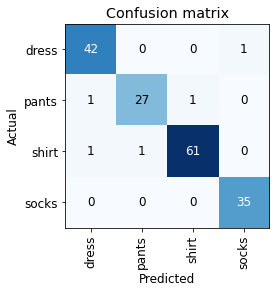

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

### Data points with the highest losses
Either wrong results with high confidence or correct results with low confidence

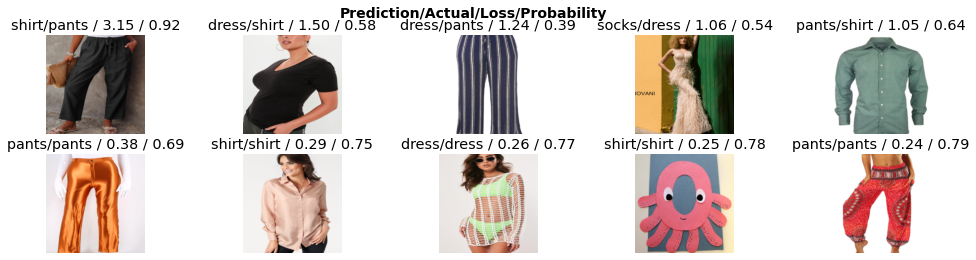

In [20]:
interp.plot_top_losses(10, nrows = 2, figsize = (17,4))

## Clean the data

In [21]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [22]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## Upload the model to HuggingFace hub
### Install git-lfs, a dependency for uploading to the hub

In [32]:
!sudo apt-get install git-lfs
!git lfs install

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 3316 kB of archives.
After this operation, 11.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 git-lfs amd64 2.9.2-1 [3316 kB]
Fetched 3316 kB in 11s (296 kB/s)                                              
Selecting previously unselected package git-lfs.
(Reading database ... 106350 files and directories currently installed.)
Preparing to unpack .../git-lfs_2.9.2-1_amd64.deb ...
Unpacking git-lfs (2.9.2-1) ...
Setting up git-lfs (2.9.2-1) ...
Processing triggers for man-db (2.9.1-1) ...
Error: Failed to call git rev-parse --git-dir: exit status 128 
Git LFS initialized.


### Login into the hub with 'write' token access

In [33]:
from huggingface_hub import notebook_login
notebook_login()

In [34]:
from huggingface_hub import push_to_hub_fastai

repo_id = "tompham97/clothe-classifier"

push_to_hub_fastai(learner = learn, repo_id = repo_id)

Cloning https://huggingface.co/tompham97/clothe-classifier into local empty directory.


Upload file model.pkl:   0%|          | 32.0k/44.8M [00:00<?, ?B/s]

To https://huggingface.co/tompham97/clothe-classifier
   79910c0..296c54a  main -> main



'https://huggingface.co/tompham97/clothe-classifier/commit/296c54abd55a55c3205135704b4c64b5d3c05223'